# Memoria de cálculo amax Kf

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
from sympy.plotting import plot
import plotly.graph_objects as go
from numpy import trapz


In [12]:
x,y,a,b,c,alfa,beta, sigma,lambd,kf,A,am,sigmay =smp.symbols('x y a b c α β σ γ k_f A amax σ_y')

### Tensão por Ilgris no furo eliptico


In [13]:
a=1
b=0.004*73+0.096
w=200
t=9
sigma=1
smax=sigma*(1+2*a/b)
smax

6.154639175257731

### Tensão segundo o (Castro & Meggiolaro, 2002)

In [14]:
sigmay=1+((a**2-2*a*b)*(x-smp.sqrt(x**2-a**2+b**2))*(x**2-a**2+b**2)+a*b**2*(a-b)*x)/((a-b)**2*(x**2-a**2+b**2)*smp.sqrt(x**2-a**2+b**2))
sigmay

(0.092132928*x + (0.224*x - 0.224*sqrt(x**2 - 0.849456))*(x**2 - 0.849456))/((0.374544*x**2 - 0.318158648064)*sqrt(x**2 - 0.849456)) + 1

In [15]:
Sy=smp.lambdify(x,sigmay)

In [16]:
Sy(a)
#tensão x=a (fim do entalho)

6.154639175257734

In [17]:
X=np.arange(a,5,0.001)
X
# X indo de a ate 5 a cada 0.001

array([1.   , 1.001, 1.002, ..., 4.997, 4.998, 4.999])

Text(0, 0.5, 'σy(mPa)')

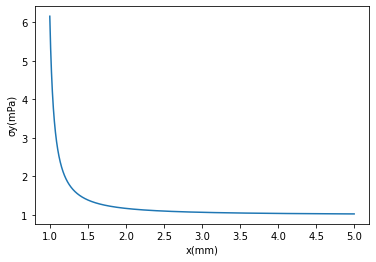

In [18]:
plt.plot(X,Sy(X))
plt.xlabel('x(mm)')
plt.ylabel('σy(mPa)')

### IMPLEMENTAÇÃO DOS PARAMETROS A,D,P,PREF

In [19]:
Pref=np.zeros(len(X))
S=Sy(X)
P=np.zeros(len(X))
A=np.zeros(len(X))
D=np.zeros(len(X))
for i in range(len(X)-1):
    P[i]=(S[i]+S[i+1])/2*(X[1]-X[0])
    Pref[i]=1*(X[1]-X[0])
    D[i]=(X[i]+X[i+1])/2-X[0]
    A[i]=X[i+1]-X[0]
    
#parametros P,A,D,PRef

In [20]:
sumP=np.zeros(len(X))
sumPr=np.zeros(len(X))
for i in range(len(X)):
    sumP[i]=sum(P[0:i])
    sumPr[i]=sum(Pref[0:i])
#vtor P e Pref acumulado

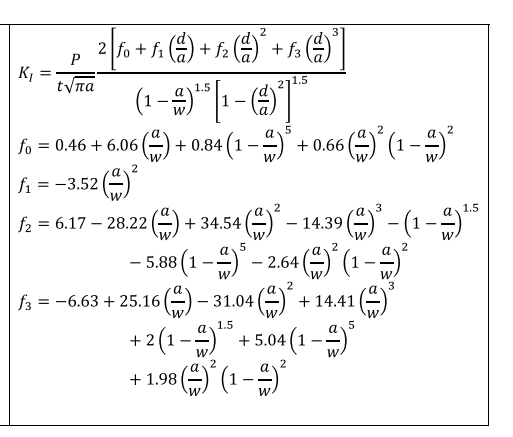

In [21]:
f0=0.46+6.06*(A/w)+0.84*(1-(A/w)**5)+0.66*(A/w)**2*(1-(A/w))**1.5
f1=-3.52*(A/w)**2
f2=6.17-28.22*(A/w)+34.54*(A/w)**2-14.39*(A/w)**3-(1-(A/w))**1.5-5.88*(1-(A/w))**5-2.64*(A/w)**2*(1-(A/(w)))**2
f3=-6.63+25.6*(A/w)-31.04*(A/w)**2+14.41*(A/w)**3+2*(1-(A/(w)))**5+5.04*(1-(A/(w)))**5+1.98*(A/w)**2*(1-(A/(w)))**2


In [22]:
kif=sumP/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\3875522346.py:1: RuntimeWarning: divide by zero encountered in true_divide
  kif=sumP/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\3875522346.py:1: RuntimeWarning: invalid value encountered in true_divide
  kif=sumP/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)


In [23]:
kifr=sumPr/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\3732381573.py:1: RuntimeWarning: divide by zero encountered in true_divide
  kifr=sumPr/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)
C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\3732381573.py:1: RuntimeWarning: invalid value encountered in true_divide
  kifr=sumPr/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)


In [24]:
kgrf=kif/kifr

C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\93922933.py:1: RuntimeWarning: invalid value encountered in true_divide
  kgrf=kif/kifr


Text(0, 0.5, 'Kgr(mPa)')

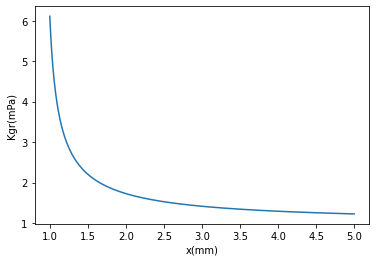

In [25]:
plt.plot(X,kgrf)
plt.xlabel('x(mm)')
plt.ylabel('Kgr(mPa)')



In [26]:
dkgr=np.zeros(len(X))
for i in range(len(X)-1):
    dkgr[i]=(kgrf[i+1]-kgrf[i])/(A[i+1]-A[i])

In [27]:
dkgr

array([         nan, -42.88800681, -42.04155177, ...,  -0.05103024,
                nan,   0.        ])

Text(0, 0.5, "Kgr'(mPa)")

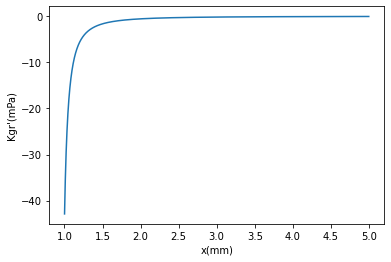

In [28]:
plt.plot(X,dkgr)
plt.xlabel('x(mm)')
plt.ylabel("Kgr'(mPa)")

In [41]:
a0=0.2
gama=2

In [42]:
fi=kgrf+2*A*(1+(a0/A)**(gama/2))*dkgr

C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\1419656641.py:1: RuntimeWarning: divide by zero encountered in true_divide
  fi=kgrf+2*A*(1+(a0/A)**(gama/2))*dkgr
C:\Users\Jonas\AppData\Local\Temp\ipykernel_740\1419656641.py:1: RuntimeWarning: invalid value encountered in multiply
  fi=kgrf+2*A*(1+(a0/A)**(gama/2))*dkgr


In [43]:
fi[0:200].round(1)

array([  nan, -11.2, -11. , -10.8, -10.6, -10.4, -10.2, -10. ,  -9.8,
        -9.7,  -9.5,  -9.3,  -9.2,  -9. ,  -8.9,  -8.7,  -8.6,  -8.4,
        -8.3,  -8.2,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.4,  -7.3,
        -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,  -6.4,
        -6.3,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.9,  -5.8,  -5.7,
        -5.6,  -5.6,  -5.5,  -5.4,  -5.3,  -5.3,  -5.2,  -5.2,  -5.1,
        -5. ,  -5. ,  -4.9,  -4.9,  -4.8,  -4.7,  -4.7,  -4.6,  -4.6,
        -4.5,  -4.5,  -4.4,  -4.4,  -4.3,  -4.3,  -4.2,  -4.2,  -4.1,
        -4.1,  -4. ,  -4. ,  -4. ,  -3.9,  -3.9,  -3.8,  -3.8,  -3.8,
        -3.7,  -3.7,  -3.6,  -3.6,  -3.6,  -3.5,  -3.5,  -3.5,  -3.4,
        -3.4,  -3.4,  -3.3,  -3.3,  -3.3,  -3.2,  -3.2,  -3.2,  -3.1,
        -3.1,  -3.1,  -3.1,  -3. ,  -3. ,  -3. ,  -2.9,  -2.9,  -2.9,
        -2.9,  -2.8,  -2.8,  -2.8,  -2.8,  -2.7,  -2.7,  -2.7,  -2.7,
        -2.6,  -2.6,  -2.6,  -2.6,  -2.6,  -2.5,  -2.5,  -2.5,  -2.5,
        -2.4,  -2.4,

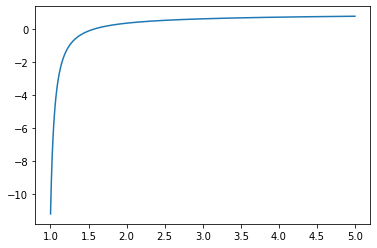

In [44]:
plt.plot(X,fi)

In [45]:
raiz=np.zeros(len(X))
for i in range(len(X)-1):
    raiz[i]=fi[i]*fi[i+1]

In [46]:
sol=np.where(raiz<0)[0]
nmax=sol[0]
nmax

560

In [47]:
amax=np.zeros(len(X))
for i in range(len(X)-1):
    amax[i]=A[i]-fi[i]*(A[1]-A[0])/(fi[i+1]-fi[i])

In [48]:
Amax=amax[nmax]
Amax

0.5610504385608855

In [49]:
amax[500:600]

array([0.55501707, 0.55521839, 0.55541628, 0.55561074, 0.55580178,
       0.55598939, 0.55617358, 0.55635434, 0.55653168, 0.5567056 ,
       0.55687609, 0.55704317, 0.55720682, 0.55736705, 0.55752385,
       0.55767724, 0.55782721, 0.55797376, 0.5581169 , 0.55825661,
       0.55839291, 0.55852579, 0.55865526, 0.55878131, 0.55890395,
       0.55902317, 0.55913898, 0.55925138, 0.55936036, 0.55946593,
       0.5595681 , 0.55966685, 0.55976219, 0.55985413, 0.55994265,
       0.56002777, 0.56010948, 0.56018779, 0.56026269, 0.56033419,
       0.56040228, 0.56046697, 0.56052825, 0.56058614, 0.56064062,
       0.56069171, 0.56073939, 0.56078367, 0.56082456, 0.56086205,
       0.56089615, 0.56092684, 0.56095415, 0.56097805, 0.56099857,
       0.56101569, 0.56102942, 0.56103976, 0.56104671, 0.56105027,
       0.56105044, 0.56104722, 0.56104062, 0.56103063, 0.56101725,
       0.56100049, 0.56098035, 0.56095682, 0.56092991, 0.56089962,
       0.56086595, 0.5608289 , 0.56078847, 0.56074466, 0.56069

In [50]:
kf=kgrf*(1+(a0/Amax)**(gama/2))**(1/gama)/np.sqrt(a0/Amax)

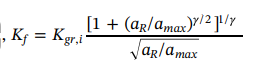

In [55]:
sumP[0:200].round(2)


array([0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06,
       0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.11, 0.11,
       0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.15, 0.15, 0.15, 0.16, 0.16,
       0.17, 0.17, 0.18, 0.18, 0.18, 0.19, 0.19, 0.2 , 0.2 , 0.2 , 0.21,
       0.21, 0.22, 0.22, 0.22, 0.23, 0.23, 0.23, 0.24, 0.24, 0.24, 0.25,
       0.25, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28, 0.28, 0.28, 0.29,
       0.29, 0.29, 0.3 , 0.3 , 0.3 , 0.31, 0.31, 0.31, 0.32, 0.32, 0.32,
       0.32, 0.33, 0.33, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.35, 0.35,
       0.36, 0.36, 0.36, 0.37, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.39,
       0.39, 0.39, 0.39, 0.4 , 0.4 , 0.4 , 0.41, 0.41, 0.41, 0.41, 0.42,
       0.42, 0.42, 0.42, 0.43, 0.43, 0.43, 0.43, 0.44, 0.44, 0.44, 0.44,
       0.45, 0.45, 0.45, 0.45, 0.46, 0.46, 0.46, 0.46, 0.47, 0.47, 0.47,
       0.47, 0.48, 0.48, 0.48, 0.48, 0.49, 0.49, 0.49, 0.49, 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.51, 0.51, 0.51, 0.51, 0.